In [38]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox
import pandas as pd
import seaborn as sns

In [3]:
# Load the data
df = pd.read_pickle('data_cabspotting/cabspotting.pkl')

In [4]:
df.head()

latitude  longitude  occupied
user   time                                              
abboip 2008-05-17 14:12:10  37.75153 -122.39447         0
       2008-05-17 14:13:34  37.75149 -122.39447         0
       2008-05-17 14:14:34  37.75149 -122.39447         0
       2008-05-17 14:15:35  37.75149 -122.39446         0
       2008-05-17 14:41:43  37.75144 -122.39449         0

In [8]:
df_abboip = df.loc['abboip']

In [13]:
north, south, east, west = 38.04691, 37.276830000000004, -121.95391333333333, -122.62829

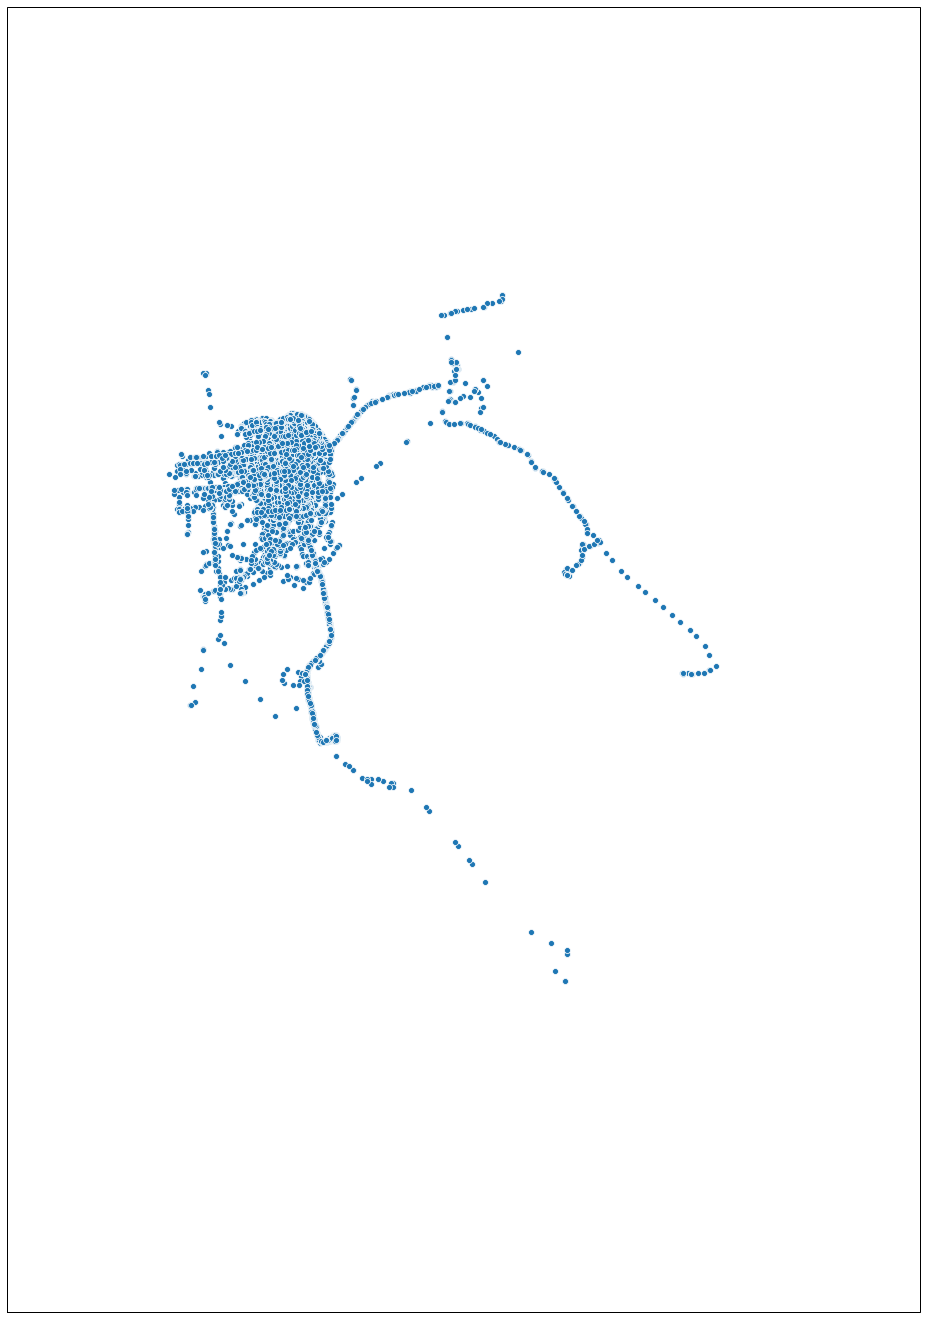

In [44]:
plt.figure(figsize=(24, 24))

ax = plt.axes(projection=ccrs.UTM(10))
ax.set_extent([west, east, south, north])

sns.scatterplot(df_abboip['longitude'], df_abboip['latitude'], transform=ccrs.PlateCarree())

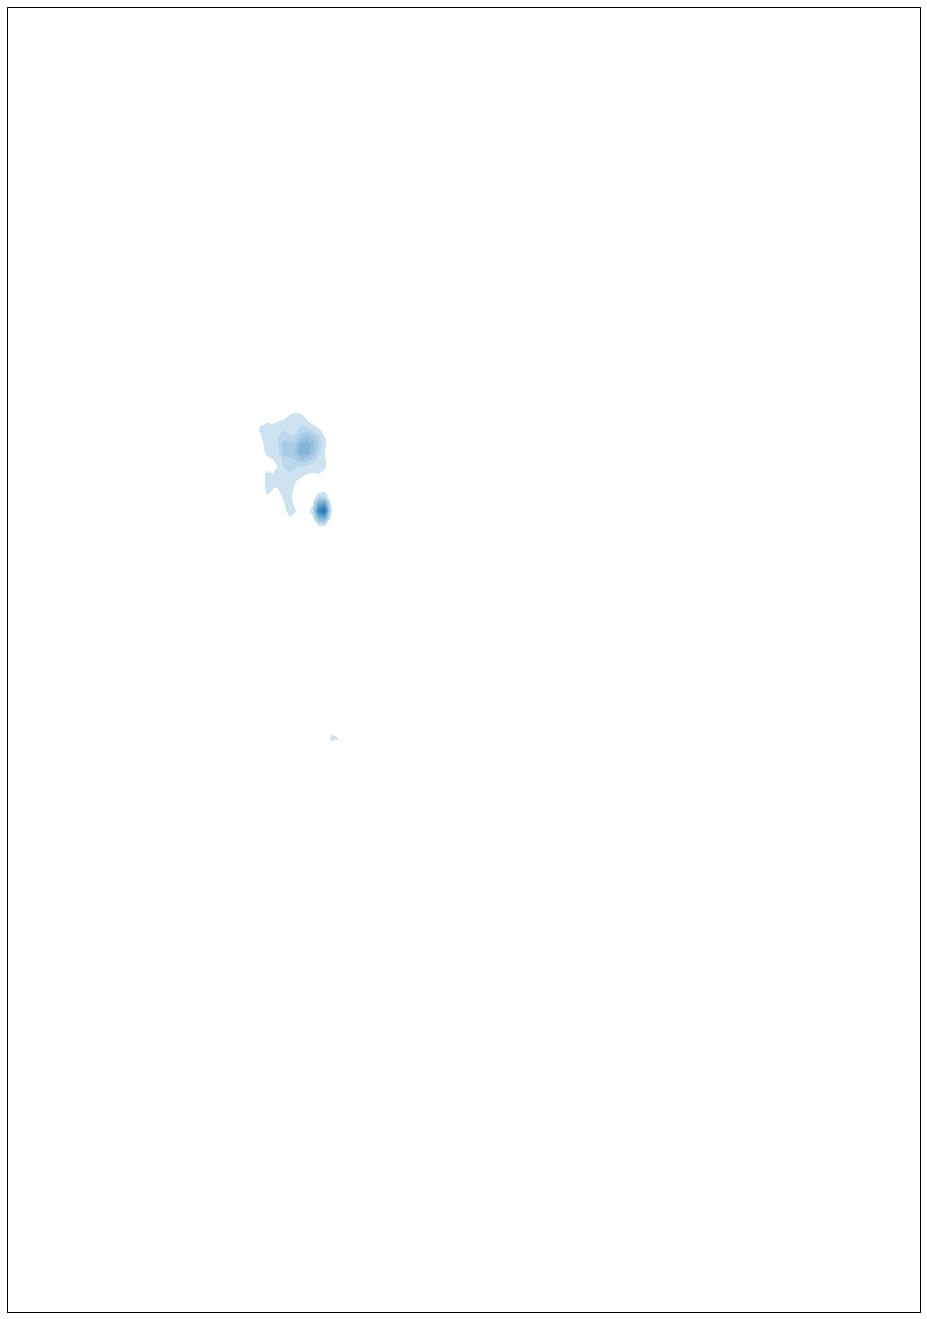

In [45]:
plt.figure(figsize=(24, 24))

ax = plt.axes(projection=ccrs.UTM(10))
ax.set_extent([west, east, south, north])

sns.kdeplot(df_abboip['longitude'], df_abboip['latitude'],
            shade=True, shade_lowest=False, transform=ccrs.PlateCarree())

In [39]:
# Load the OSMNX graph
streets = ox.load_graphml('cabspotting_streets_all.graphml', folder='osmnx_data')

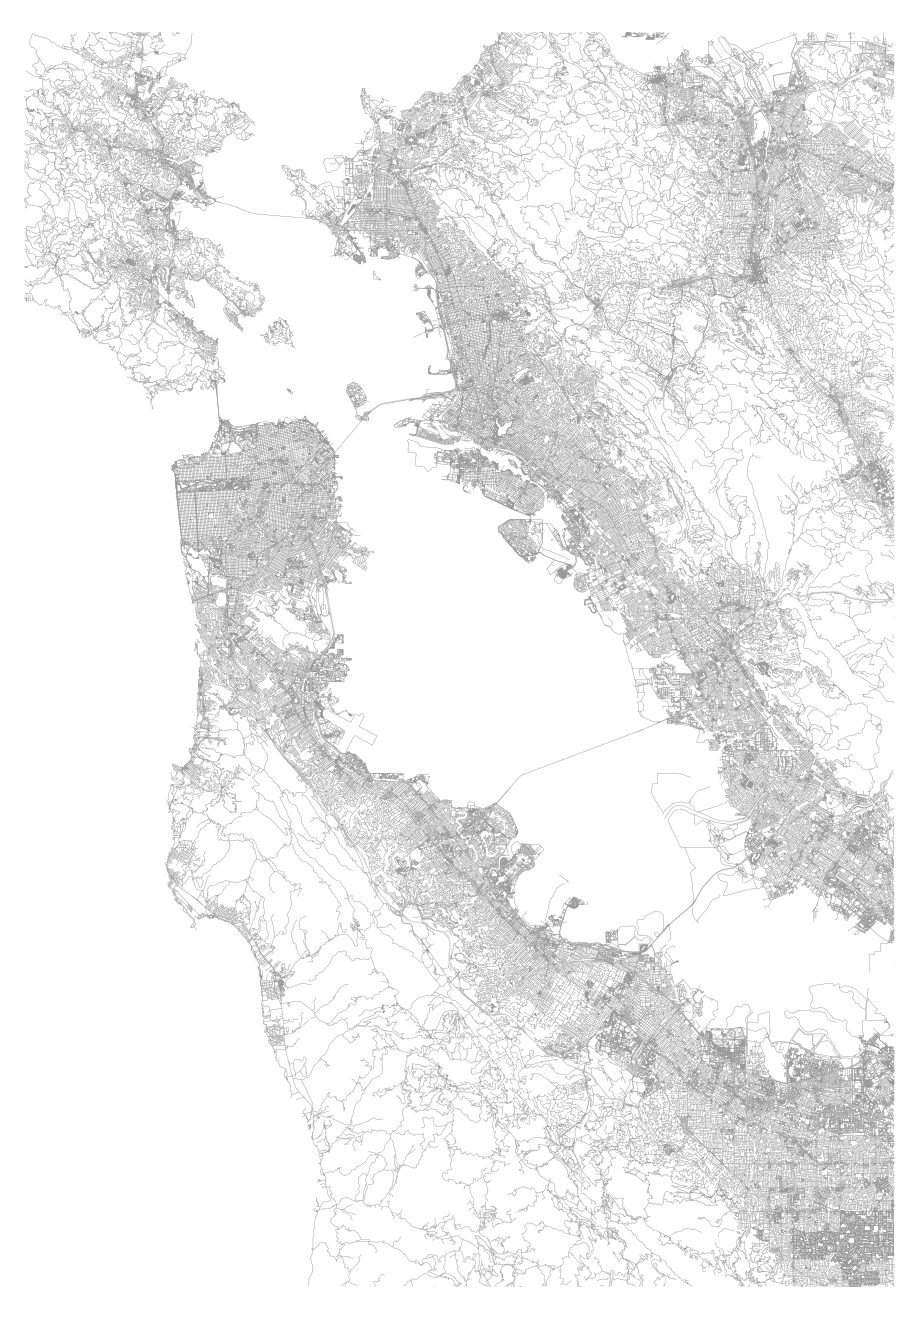

(<Figure size 1513.26x1728 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x3e7046d68>)

In [43]:
ox.plot_graph(streets, fig_height=24, node_size=0, edge_linewidth=0.25)

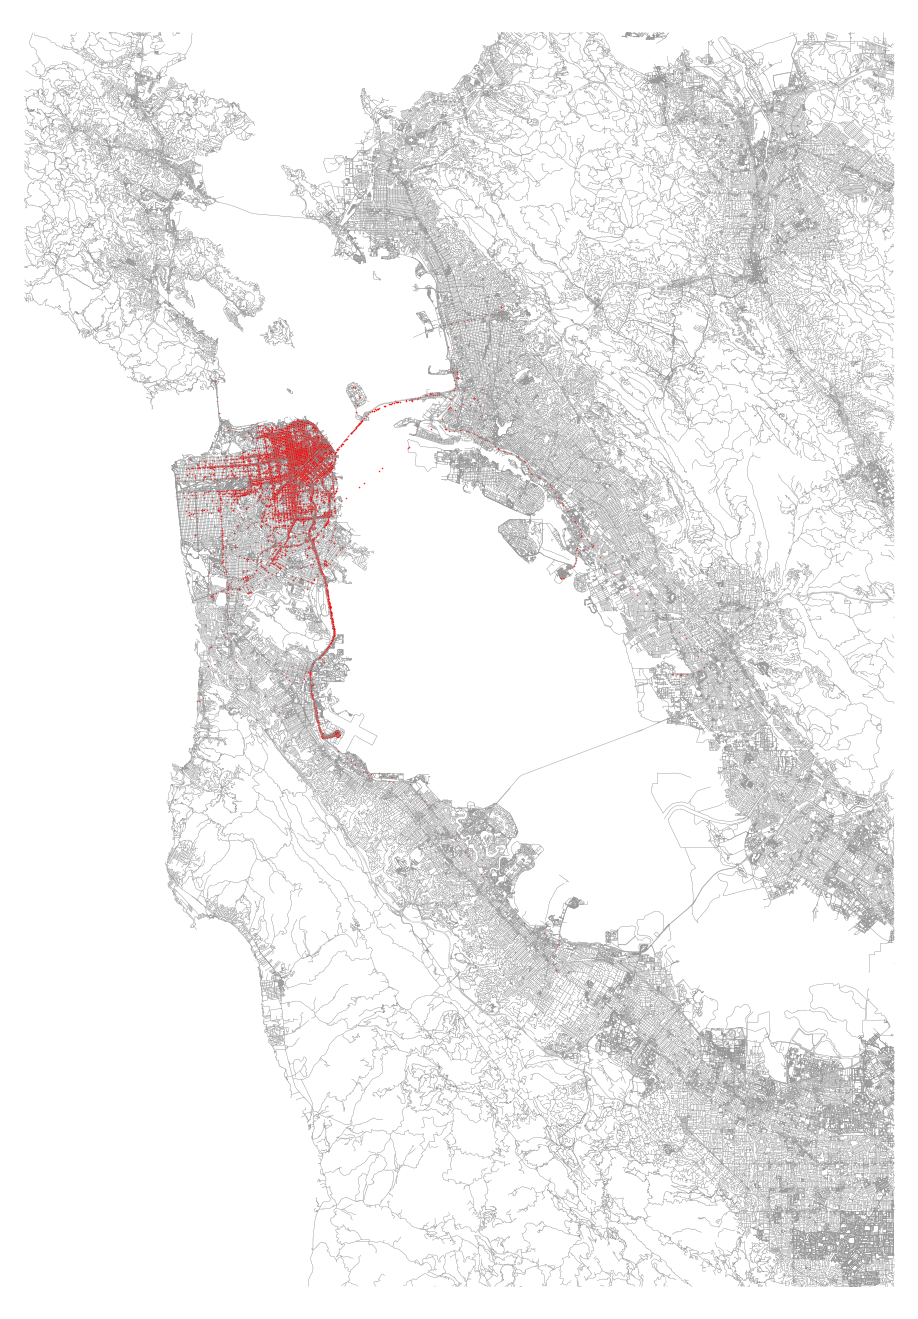

In [62]:
fig, ax = ox.plot_graph(streets, fig_height=24, node_size=0, edge_linewidth=0.25, show=False, close=False)
ax.scatter(df_abboip['longitude'], df_abboip['latitude'], c='#ff0000', s=0.25, alpha=1.0)

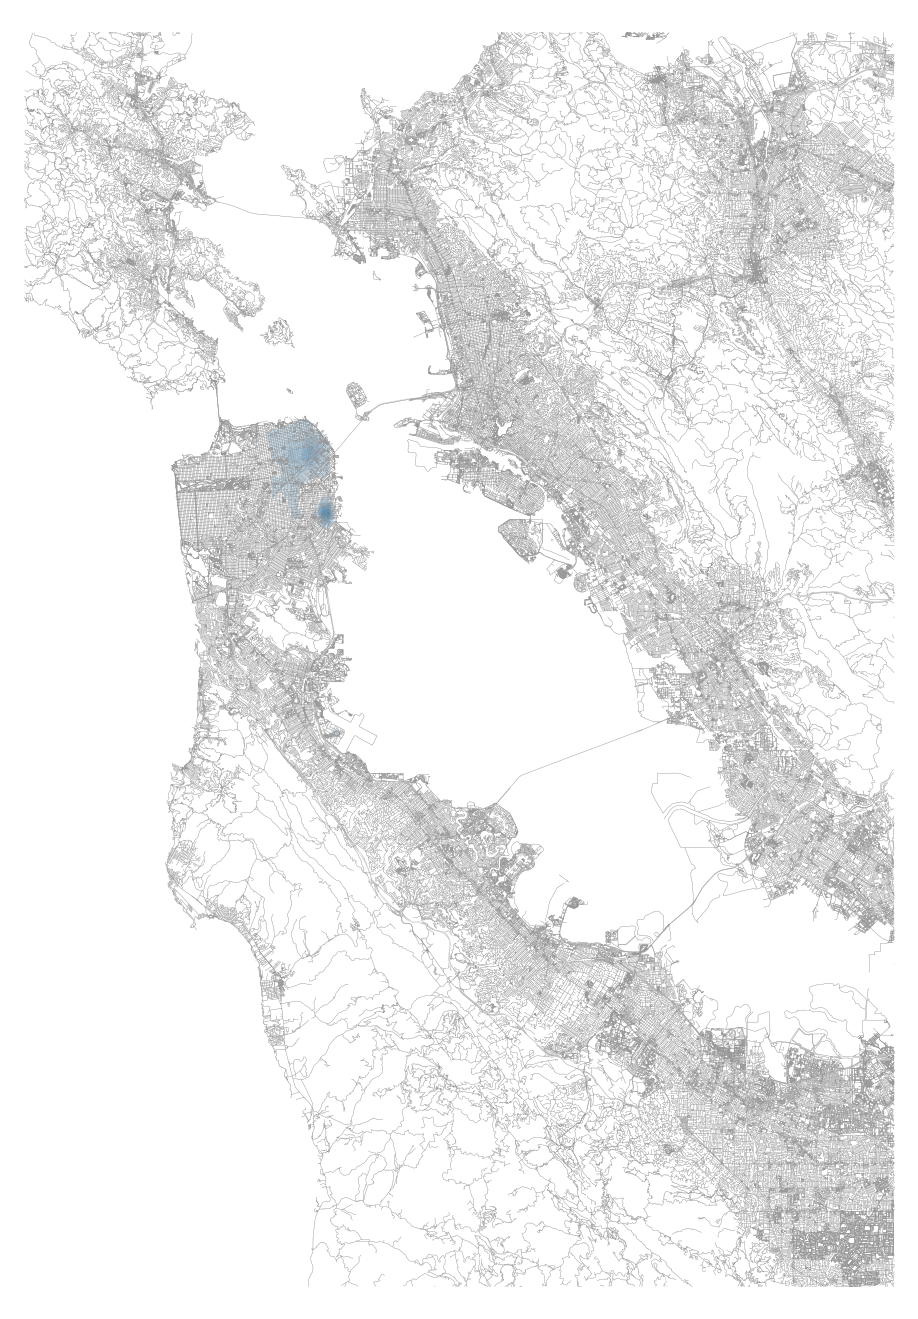

In [63]:
fig, ax = ox.plot_graph(streets, fig_height=24, node_size=0, edge_linewidth=0.25, show=False, close=False)
sns.kdeplot(df_abboip['longitude'], df_abboip['latitude'],
            shade=True, shade_lowest=False, ax=ax)

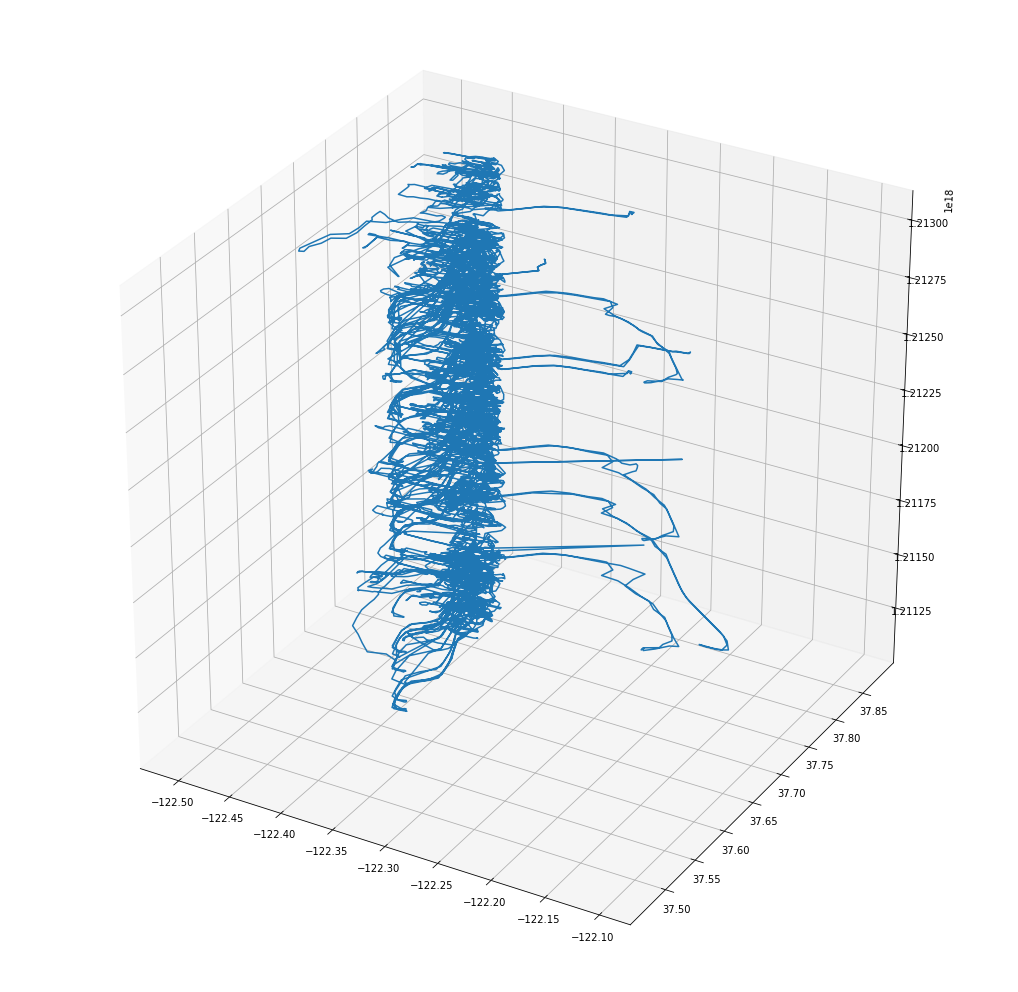

In [78]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 18))
ax = fig.gca(projection='3d')
ax.plot(df_abboip['longitude'], df_abboip['latitude'], df_abboip.index.to_series())

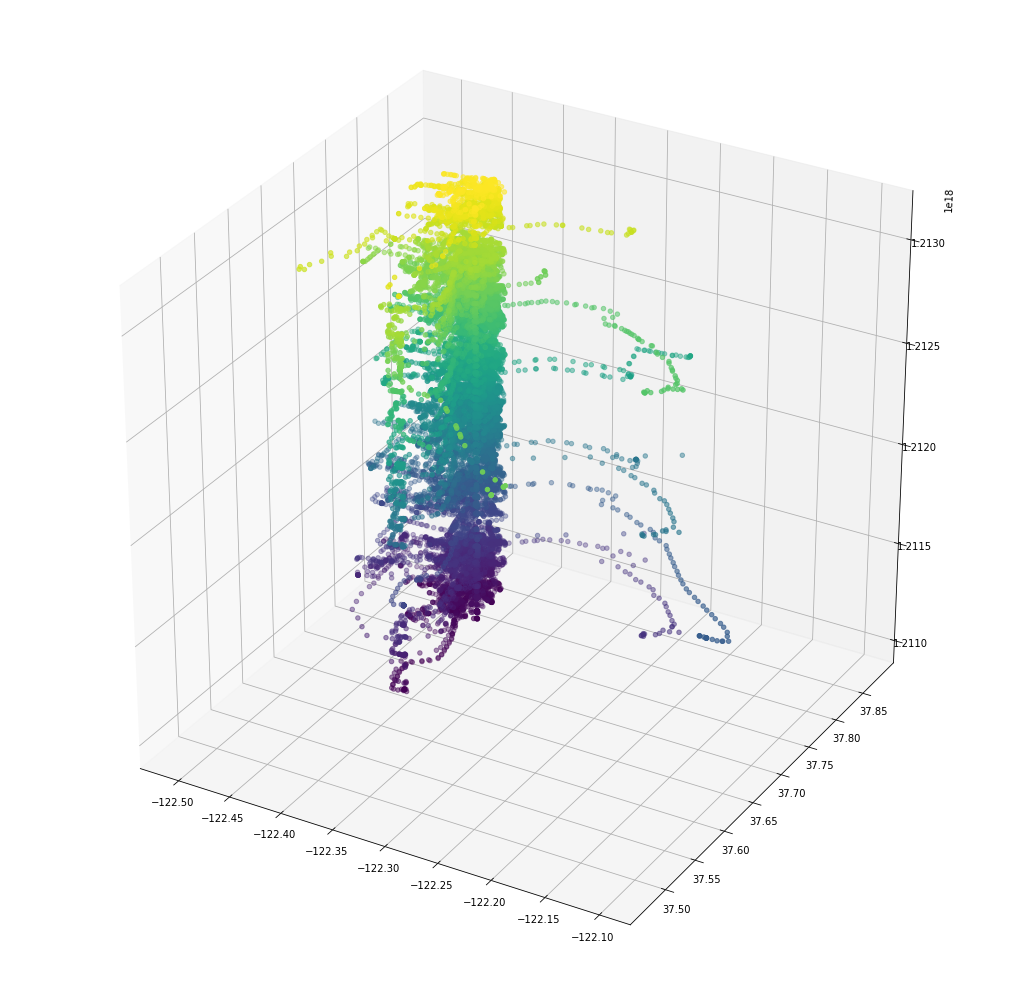

In [79]:
fig = plt.figure(figsize=(18, 18))
ax = fig.gca(projection='3d')
ax.scatter(df_abboip['longitude'], df_abboip['latitude'], df_abboip.index.to_series(), c=df_abboip.index.to_series())

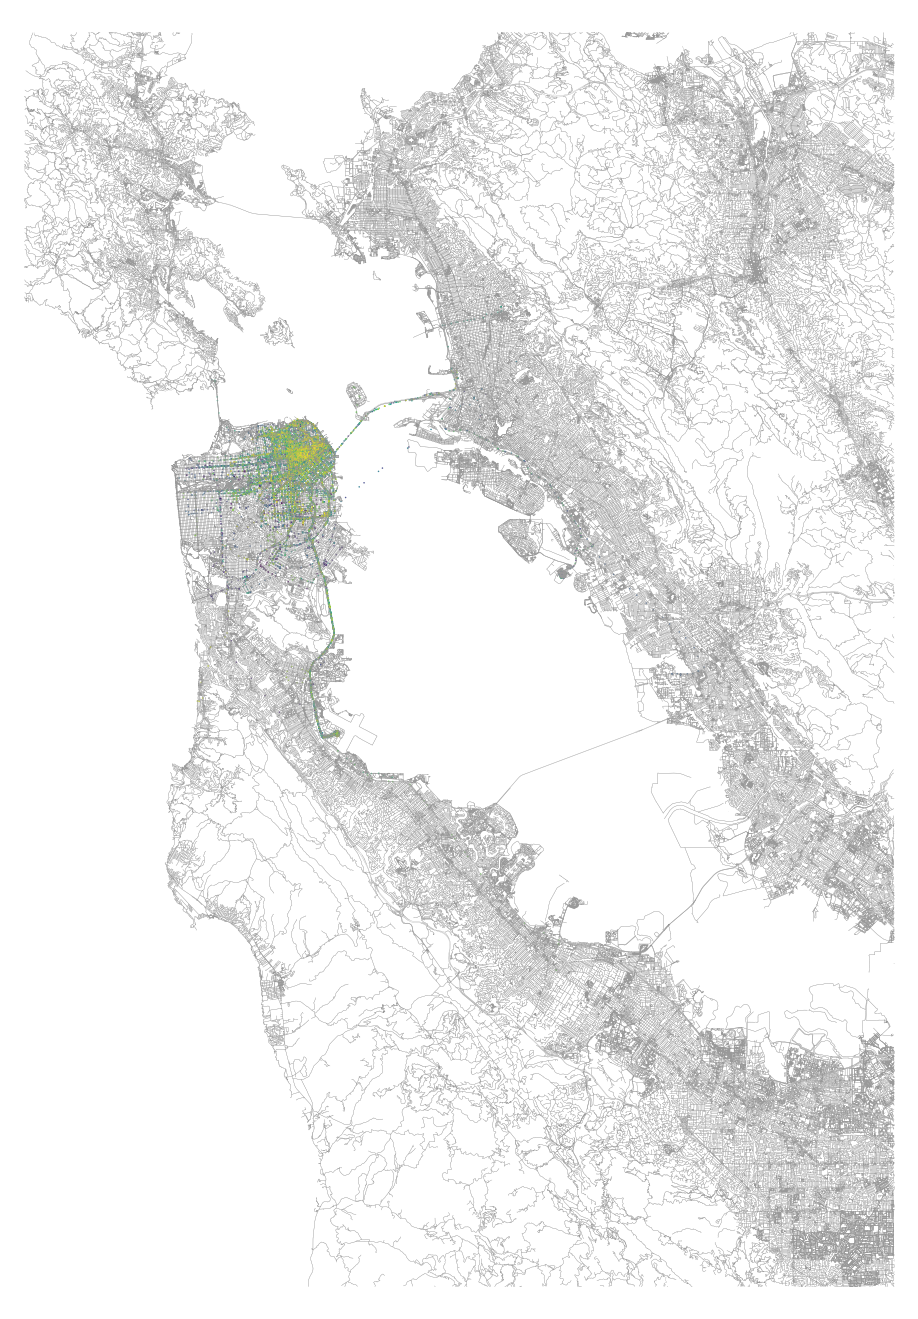

In [73]:
fig, ax = ox.plot_graph(streets, fig_height=24, node_size=0, edge_linewidth=0.25, show=False, close=False)
ax.scatter(df_abboip['longitude'], df_abboip['latitude'], c=df_abboip.index.to_series(), s=0.25, alpha=1.0)

In [82]:
df_abboip['hour'] = df_abboip.index.to_series().dt.hour

/Users/jankaiser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [83]:
df_abboip.head()

latitude  longitude  occupied  hour
time                                                    
2008-05-17 14:12:10  37.75153 -122.39447         0    14
2008-05-17 14:13:34  37.75149 -122.39447         0    14
2008-05-17 14:14:34  37.75149 -122.39447         0    14
2008-05-17 14:15:35  37.75149 -122.39446         0    14
2008-05-17 14:41:43  37.75144 -122.39449         0    14

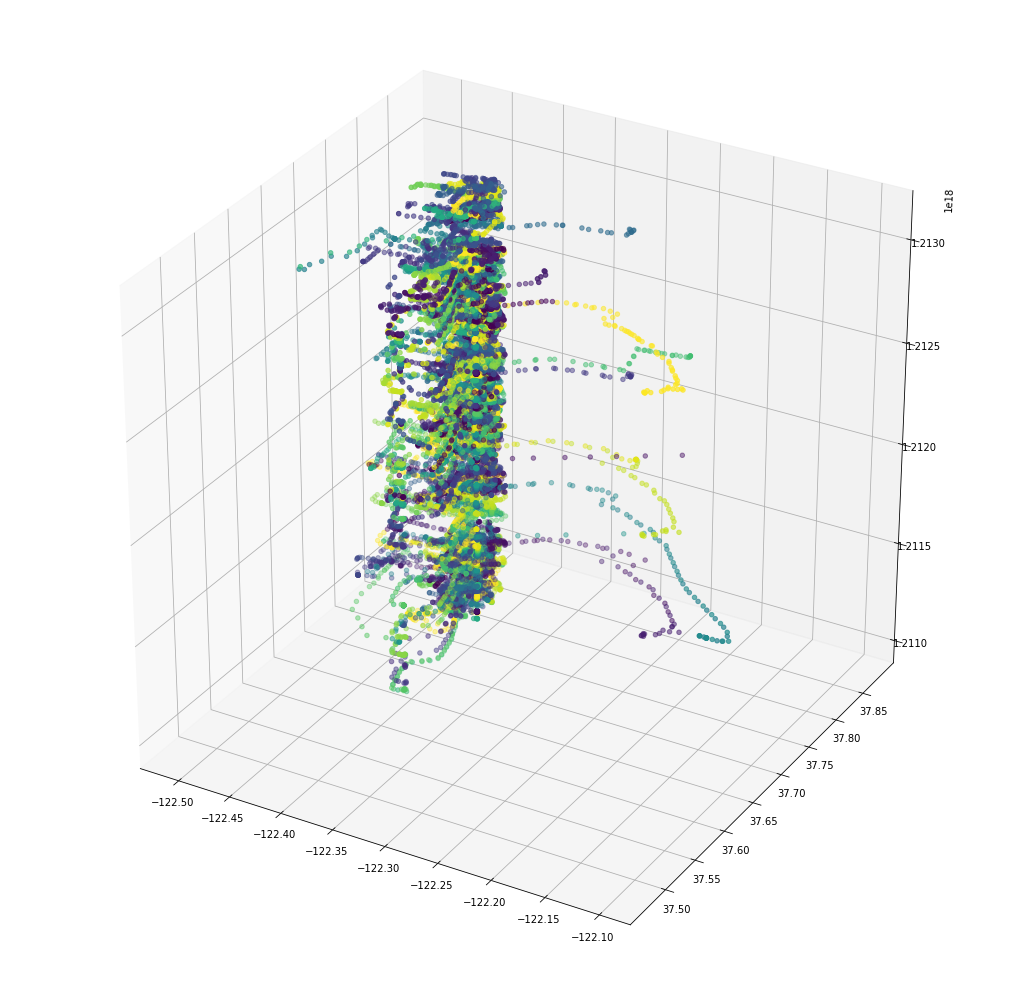

In [85]:
fig = plt.figure(figsize=(18, 18))
ax = fig.gca(projection='3d')
ax.scatter(df_abboip['longitude'], df_abboip['latitude'], df_abboip.index.to_series(), c=df_abboip['hour'])

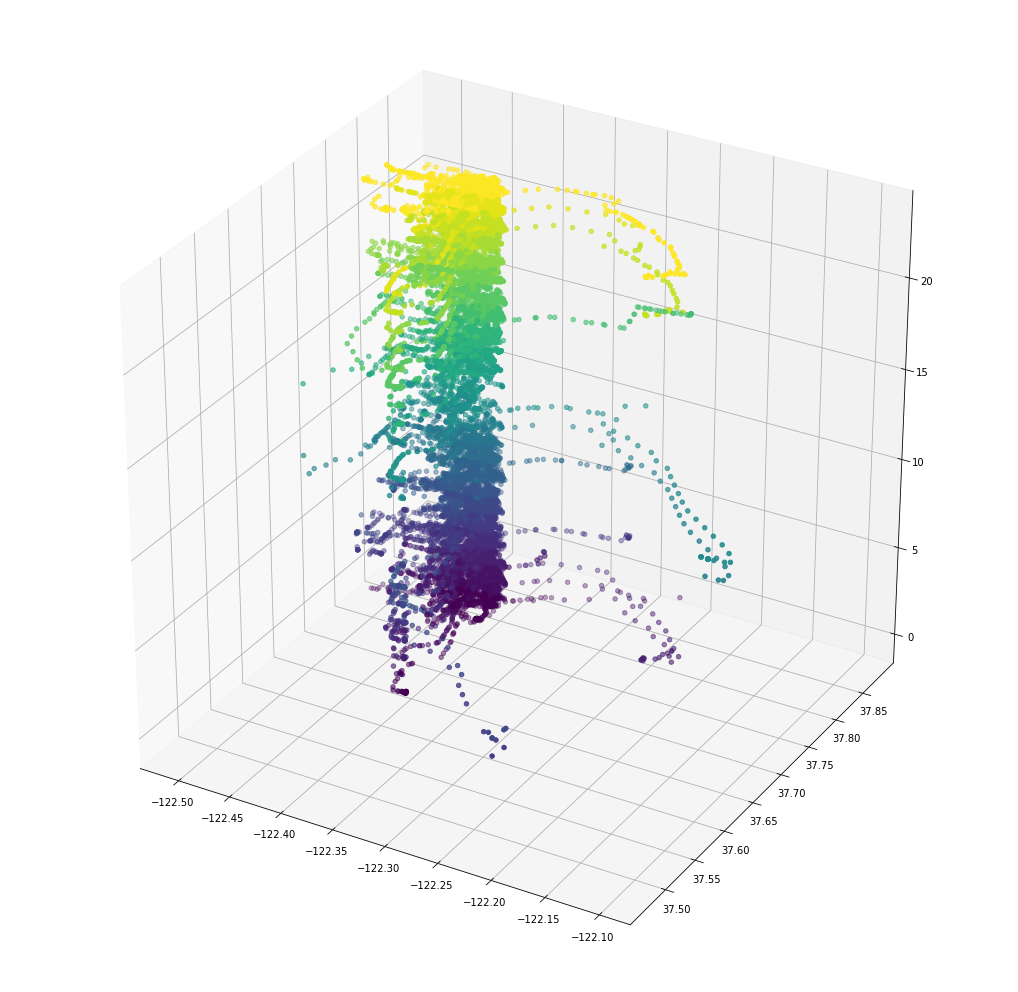

In [86]:
fig = plt.figure(figsize=(18, 18))
ax = fig.gca(projection='3d')
ax.scatter(df_abboip['longitude'], df_abboip['latitude'], df_abboip['hour'], c=df_abboip['hour'])